# **Data Visualization Notebook**

## Objectives

- Answer Business Requirement 1: Provide visual insights to differentiate between healthy and mildew-affected leaves.
- Explore dataset composition: Visualize class distributions, pixel intensity differences, and image characteristics.
- Assess dataset quality: Identify potential biases, imbalances, and variability in images.
- Generate visualization outputs: Create charts, PCA plots, and image montages to support Streamlit dashboard development.
- Guide preprocessing strategies: Support decisions regarding resizing, normalization, and augmentation.

## Inputs

- inputs/mildew_dataset/cherry-leaves/train
- inputs/mildew_dataset/cherry-leaves/validation
- inputs/mildew_dataset/cherry-leaves/test

## Outputs

- Dataset Overview
  - Total image count and class distribution (Healthy vs. Infected).
  - Image montage for dataset quality inspection.
- Image Statistics & Analysis
  - Average image size for preprocessing standardization.
  - Mean and variability analysis for Healthy and Infected leaves.
  -  Histogram of pixel intensity distribution to assess brightness differences.
  - PCA plot to visualize class separability in feature space.
  - Statistical t-test for pixel intensity differences between Healthy and Infected leaves.
- Data Artifacts
  - image_shape.pkl: Stores the average image shape for preprocessing.
  - Visualizations saved for integration into the Streamlit dashboard.

## Additional Comments

- The analysis confirms that the dataset is balanced, ensuring unbiased model evaluation.
- PCA and pixel intensity histograms reveal strong differentiating features between Healthy and Infected leaves.
- Statistical tests validate significant brightness differences between classes.
- These insights guide feature engineering strategies, preprocessing steps, and data augmentation techniques for model training.
- The visual outputs will be integrated into the Streamlit dashboard for interactive exploration.



---

# Set Data Directory

---

## Import Necessary Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

## Set Working Directory

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('/workspaces/mildew-detector')
print("You set a new current directory")

You set a new current directory


#### Confirm the new current directory

In [4]:
work_dir = os.getcwd()
work_dir

'/workspaces/mildew-detector'

## Set Input Directories

In [5]:
# Set input directories
my_data_dir = 'inputs/mildew_dataset/cherry-leaves'
train_path = os.path.join(my_data_dir, 'train')
val_path = os.path.join(my_data_dir, 'validation')
test_path = os.path.join(my_data_dir, 'test')

---

# Dataset Integrity Checks

---

## Image File Count & Directory Check

In [6]:
import os

sets = ['train', 'test', 'validation']
labels = ['Healthy', 'Infected']  

for set_name in sets:
    for label in labels:
        path = f'inputs/mildew_dataset/cherry-leaves/{set_name}/{label}' 
        try:
            number_of_files = len(os.listdir(path))
            print(f'There are {number_of_files} images in {set_name}/{label}')
        except FileNotFoundError:
            print(f"Error: Directory '{path}' not found.")

# Calculate and print total number of images
total_images = 0
for set_name in sets:
    for label in labels:
        path = f'inputs/mildew_dataset/cherry-leaves/{set_name}/{label}'  
        try:
            total_images += len(os.listdir(path))
        except FileNotFoundError:
            pass
print(f"\nTotal number of images: {total_images}")

There are 1472 images in train/Healthy
There are 1472 images in train/Infected
There are 422 images in test/Healthy
There are 422 images in test/Infected
There are 210 images in validation/Healthy
There are 210 images in validation/Infected

Total number of images: 4208


## Check for Missing Classes and Empty Folders

In [7]:
import os

# Set dataset path
dataset_path = "inputs/mildew_dataset/cherry-leaves"
sets = ["train", "validation", "test"]
labels = ["Healthy", "Infected"]

# Check for Missing Classes & Empty Folders
for set_name in sets:
    set_path = os.path.join(dataset_path, set_name)
    
    if not os.path.exists(set_path):
        print(f"Warning: '{set_name}' folder is missing!")
        continue  # Skip to the next set if the folder is missing

    for label in labels:
        label_path = os.path.join(set_path, label)
        
        if not os.path.exists(label_path):
            print(f"Missing Class: '{label}' folder is missing in '{set_name}'!")
        elif len(os.listdir(label_path)) == 0:
            print(f"Empty Folder: '{label}' in '{set_name}' has no images!")
        else:
            print(f"{label} in {set_name} is OK with {len(os.listdir(label_path))} images.")

Healthy in train is OK with 1472 images.
Infected in train is OK with 1472 images.
Healthy in validation is OK with 210 images.
Infected in validation is OK with 210 images.
Healthy in test is OK with 422 images.
Infected in test is OK with 422 images.


## Set Output Directory

In [8]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

## Set Label Names

In [9]:
# Set the labels for the images
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['Healthy', 'Infected']


---

# Dataset Overview & Class Distribution

---

## Count Total Number of Images per Class

In [10]:
import os

sets = ['train', 'test', 'validation']
labels = ['Healthy', 'Infected']  

for set_name in sets:
    for label in labels:
        path = f'inputs/mildew_dataset/cherry-leaves/{set_name}/{label}' 
        try:
            number_of_files = len(os.listdir(path))
            print(f'There are {number_of_files} images in {set_name}/{label}')
        except FileNotFoundError:
            print(f"Error: Directory '{path}' not found.")

# Calculate and print total number of images
total_images = 0
for set_name in sets:
    for label in labels:
        path = f'inputs/mildew_dataset/cherry-leaves/{set_name}/{label}'  
        try:
            total_images += len(os.listdir(path))
        except FileNotFoundError:
            pass
print(f"\nTotal number of images: {total_images}")

There are 1472 images in train/Healthy
There are 1472 images in train/Infected
There are 422 images in test/Healthy
There are 422 images in test/Infected
There are 210 images in validation/Healthy
There are 210 images in validation/Infected

Total number of images: 4208


## Class Distribution: Image Count Bar Chart

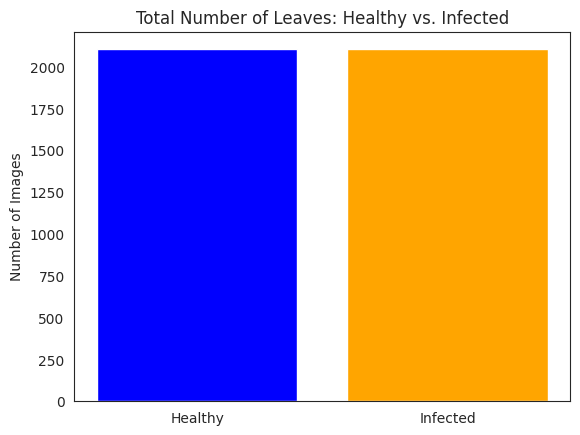

In [11]:
import os
import matplotlib.pyplot as plt

# Define dataset path
dataset_path = "inputs/mildew_dataset/cherry-leaves"

# Count total images for each class (Healthy & Infected) across all dataset splits
healthy_count = sum(len(os.listdir(os.path.join(dataset_path, split, "Healthy"))) for split in ["train", "validation", "test"])
infected_count = sum(len(os.listdir(os.path.join(dataset_path, split, "Infected"))) for split in ["train", "validation", "test"])

# Plot bar chart
plt.bar(["Healthy", "Infected"], [healthy_count, infected_count], color=["blue", "orange"])
plt.title("Total Number of Leaves: Healthy vs. Infected")
plt.ylabel("Number of Images")
plt.show()

---

## Sample Image Preview

2025-02-24 13:18:56.751383: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-24 13:18:57.733841: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


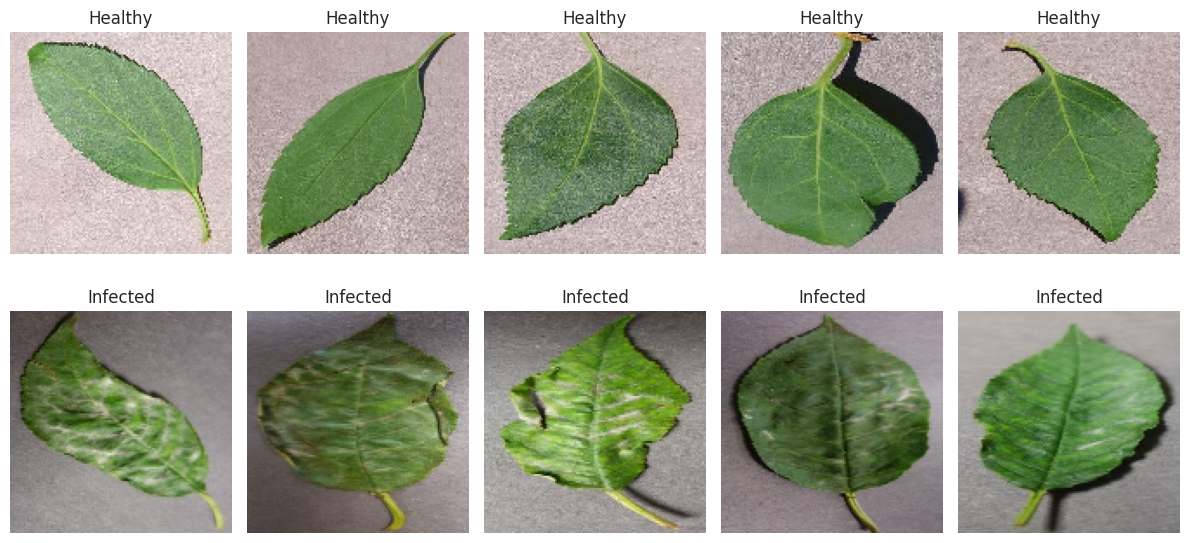

In [12]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing import image

# Display Sample Images from Healthy and Infected Classes
def display_sample_images(dataset_path, labels, n_images=5, img_size=(128, 128)):
    fig, axes = plt.subplots(2, n_images, figsize=(12, 6))
    
    for i, label in enumerate(labels):
        label_path = os.path.join(dataset_path, label)
        sample_images = random.sample(os.listdir(label_path), n_images)
        
        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(label_path, img_name)
            img = image.load_img(img_path, target_size=img_size)
            axes[i, j].imshow(img)
            axes[i, j].axis("off")
            axes[i, j].set_title(label)

    plt.tight_layout()
    plt.show()

# Run the function for test set images
display_sample_images(test_path, labels, n_images=5, img_size=(128, 128))

---

# Data Visualization of Image Data

---

## Image Characteristics

### Image Shape

- Compute average image dimensions in the training set.
- Ensure consistency for model preprocessing.

In [13]:
import plotly.express as px
from matplotlib.image import imread

# Compute image dimensions
dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(os.path.join(train_path, label)):
        img = imread(os.path.join(train_path, label, image_filename))
        d1, d2, colors = img.shape
        dim1.append(d1)  # Image height
        dim2.append(d2)  # Image width

# Convert to NumPy array for easier calculations
dim1 = np.array(dim1)
dim2 = np.array(dim2)

# Compute average dimensions
dim1_mean = int(dim1.mean())
dim2_mean = int(dim2.mean())

# Create an interactive scatter plot
fig = px.scatter(
    x=dim2, y=dim1, opacity=0.5,
    labels={'x': "Width (pixels)", 'y': "Height (pixels)"},
    title="Image Dimensions Scatter Plot"
)

# Add mean lines
fig.add_vline(x=dim2_mean, line_dash="dash", line_color="red", annotation_text=f"Avg Width: {dim2_mean}px")
fig.add_hline(y=dim1_mean, line_dash="dash", line_color="red", annotation_text=f"Avg Height: {dim1_mean}px")

# Show interactive plot
fig.show()

# Print average values
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

Width average: 256 
Height average: 256


- The **average image size** is **256x256**, but images will be **rescaled to 128x128** for **computational efficiency**.
- Pixel values are normalized to [0,1] by dividing by 255 to ensure consistent model inputs.

In [14]:
image_shape = (128, 128, 3)
image_shape

(128, 128, 3)

### Save the Image Shape Embeddings

In [15]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

---

# Average and Variability of Images per Label

---

- To compute and visualize mean image representations and variability across labels.
- To identify statistical differences between Healthy and Infected leaves.

## Function to Load Images in an Array (Tensor)

In [16]:
from tensorflow.keras.preprocessing import image

def load_image_as_array(my_data_dir, new_size=image_shape[:2], n_images_per_label=20):
    """
    Loads images, resizes them, and returns them as arrays with labels.
    """
    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    labels = os.listdir(my_data_dir)

    for label in labels:
        counter = 0
        for image_filename in os.listdir(my_data_dir + '/' + label):
            if counter < n_images_per_label:
                img = image.load_img(
                    my_data_dir + '/' + label + '/' + image_filename, 
                    target_size=new_size)  # (height, width)

                img_resized = image.img_to_array(img) / 255  # Normalize pixel values

                # Append image data and reshape correctly
                X = np.append(X, img_resized).reshape(-1, new_size[0], new_size[1], img_resized.shape[2])
                y = np.append(y, label)
                counter += 1

    return X, y

## Load Image Shapes and Labels in an Array

In [17]:
X, y = load_image_as_array(my_data_dir=train_path,
                           new_size=image_shape,
                           n_images_per_label=30)
print(X.shape, y.shape)

(60, 128, 128, 3) (60,)


## Plot and Save Mean and Variability of Images per Label

- Computes the average image for each class.
- Displays the variability (standard deviation) of pixel intensities within each class.

In [18]:
def plot_mean_variability_per_labels(X, y, figsize=(12, 5), save_image=False):
    """
    The pseudo-code for the function is:
    * Iterate through all unique labels in the dataset.
    * Filter the dataset to include only images corresponding to the current label.
    * Calculate the mean and standard deviation for the filtered subset.
    * Create a figure with two subplots:
        - One displaying the mean image for the label.
        - The other showing the variability (standard deviation) image.
    * Optionally save the generated plots to the specified directory.
    """

    for label_to_display in np.unique(y):
        sns.set_style("white")  # Set the plot style

        # Create a boolean mask to filter images for the current label
        boolean_mask = (y == label_to_display)
        arr = X[boolean_mask]

        # Compute the mean image and standard deviation image for the current label
        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)

        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")

        # Create a figure to display the average and variability images
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average image for label {label_to_display}")
        if avg_img.shape[-1] == 3:  # Check if RGB
            axes[0].imshow(avg_img)  # No cmap for RGB
            axes[1].imshow(std_img)
        else:  # Grayscale
            axes[0].imshow(avg_img, cmap='gray')
            axes[1].imshow(std_img, cmap='gray')

        axes[1].set_title(f"Variability image for label {label_to_display}")

        # Save or display the figure based on the `save_image` argument
        if save_image:
            plt.savefig(f"{file_path}/avg_var_{label_to_display}.png",
                        bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()  # Adjust layout for better spacing
            plt.show()
        print("\n")

==== Label Healthy ====
Image Shape: (128, 128, 3)


==== Label Infected ====
Image Shape: (128, 128, 3)




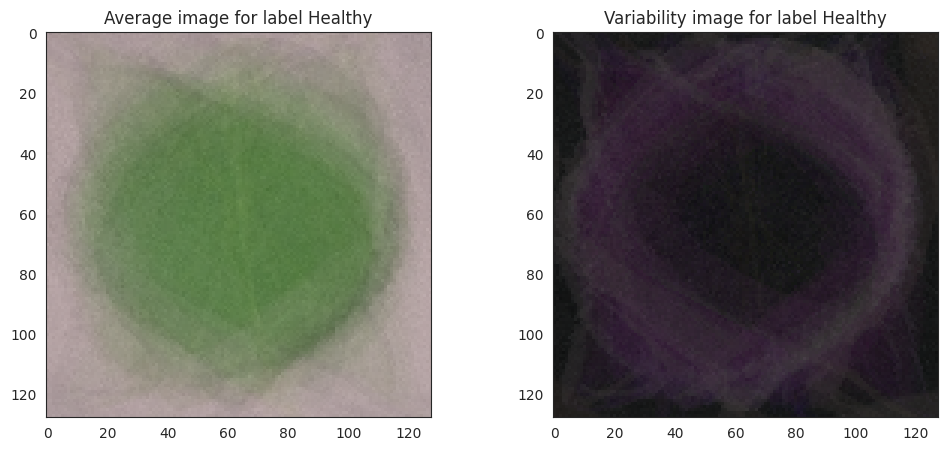

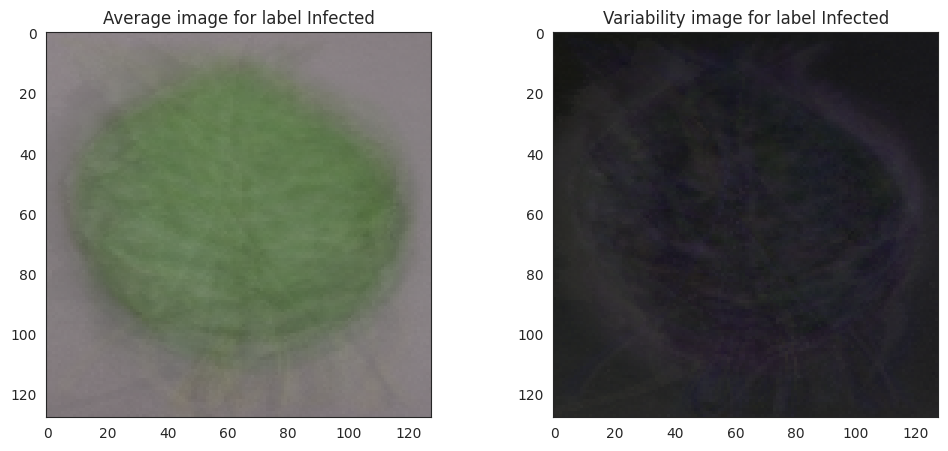

In [19]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True)

---

# Difference Between Average Healthy vs. Infected Cell Images

---

- Identify visual differences between Healthy and Infected leaves.
- Generate mean image comparisons for class differentiation.

In [20]:
def subset_image_label(X, y, label_to_display):
    """
    Filters the dataset to include only the images that belong to a specific label.
    """
    # Create a boolean mask to filter for the given label
    boolean_mask = (y == label_to_display)
    df = X[boolean_mask]  # Subset the dataset
    return df


def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2, figsize=(12, 10), save_image=False):
    """
    Compares the average images between two specified labels.
    """
    sns.set_style("white")

    # Calculate mean images
    label1_avg = np.mean(X[y == label_1], axis=0)
    label2_avg = np.mean(X[y == label_2], axis=0)

    # **Fix Clipping Issue**
    difference_mean = np.clip(label1_avg - label2_avg, 0, 1)  # Clipping Fix

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)

    # Determine if the images are RGB or Grayscale
    is_rgb = label1_avg.shape[-1] == 3

    axes[0].imshow(label1_avg if is_rgb else label1_avg, cmap=None if is_rgb else 'gray')
    axes[0].set_title(f'Average {label_1}')

    axes[1].imshow(label2_avg if is_rgb else label2_avg, cmap=None if is_rgb else 'gray')
    axes[1].set_title(f'Average {label_2}')

    axes[2].imshow(difference_mean if is_rgb else difference_mean, cmap=None if is_rgb else 'gray')
    axes[2].set_title(f'Difference image: Avg {label_1} & {label_2}')

    # Save or display the figure
    if save_image:
        plt.savefig(f"{file_path}/avg_diff.png", bbox_inches='tight', dpi=150)
    else:
        plt.tight_layout()
        plt.show()

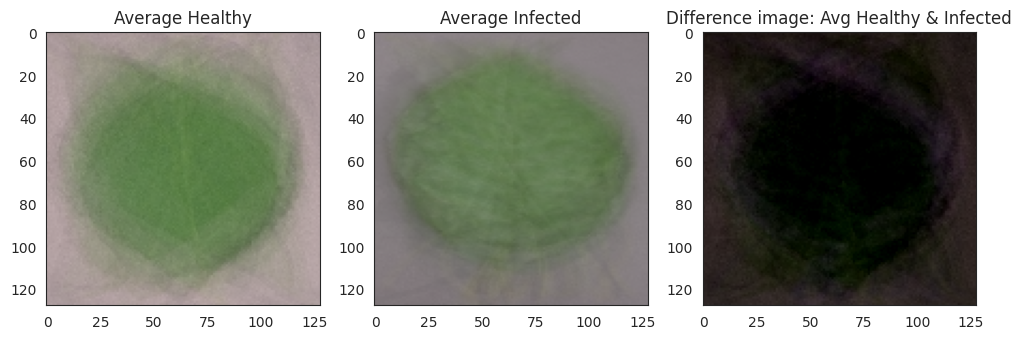

In [21]:
diff_bet_avg_image_labels_data_as_array(X=X, y=y,
                                        label_1='Healthy', label_2='Infected',
                                        figsize=(12, 10),
                                        save_image=True
                                        )

## Image Montage

In [22]:
import itertools
import random
sns.set_style("white")


def image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15, 10)):
    """
    - Verify if the specified label exists in the directory.
    - Ensure the grid size (nrows * ncols) does not exceed the number of available images.
    - Select random images to fill the montage grid
    - Create a figure to display the images, loading and plotting each in the respective grid space.
    """

    labels = os.listdir(dir_path)

    # Check if the specified label exists in the directory
    if label_to_display in labels:

        # Validate that the montage grid can fit the available images
        images_list = os.listdir(dir_path + '/' + label_to_display)
        if nrows * ncols <= len(images_list):  
            img_idx = random.sample(images_list, nrows * ncols)
        else:
            print(
                f"Reduce the number of rows or columns for the montage. \n"
                f"There are only {len(images_list)} images available. "
                f"You requested a grid for {nrows * ncols} images.")
            return

        # Generate grid indices based on the number of rows and columns
        list_rows = range(0, nrows)
        list_cols = range(0, ncols)
        plot_idx = list(itertools.product(list_rows, list_cols))

        # Create a figure and populate it with the selected images
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        for x in range(0, nrows * ncols):
            img = imread(dir_path + '/' + label_to_display + '/' + img_idx[x])
            img_shape = img.shape
            axes[plot_idx[x][0], plot_idx[x][1]].imshow(img)
            axes[plot_idx[x][0], plot_idx[x][1]].set_title(
                f"Width: {img_shape[1]}px, Height: {img_shape[0]}px")
            axes[plot_idx[x][0], plot_idx[x][1]].set_xticks([])
            axes[plot_idx[x][0], plot_idx[x][1]].set_yticks([])
        plt.tight_layout()
        plt.show()
        plt.close(fig)  

    else:
        # Notify the user if the selected label does not exist
        print(f"The selected label '{label_to_display}' does not exist.")
        print(f"Available labels are: {labels}")

## Run Montage

- The image montage provides an overview of dataset diversity.
- This is useful for visual quality checks before model training.

Healthy


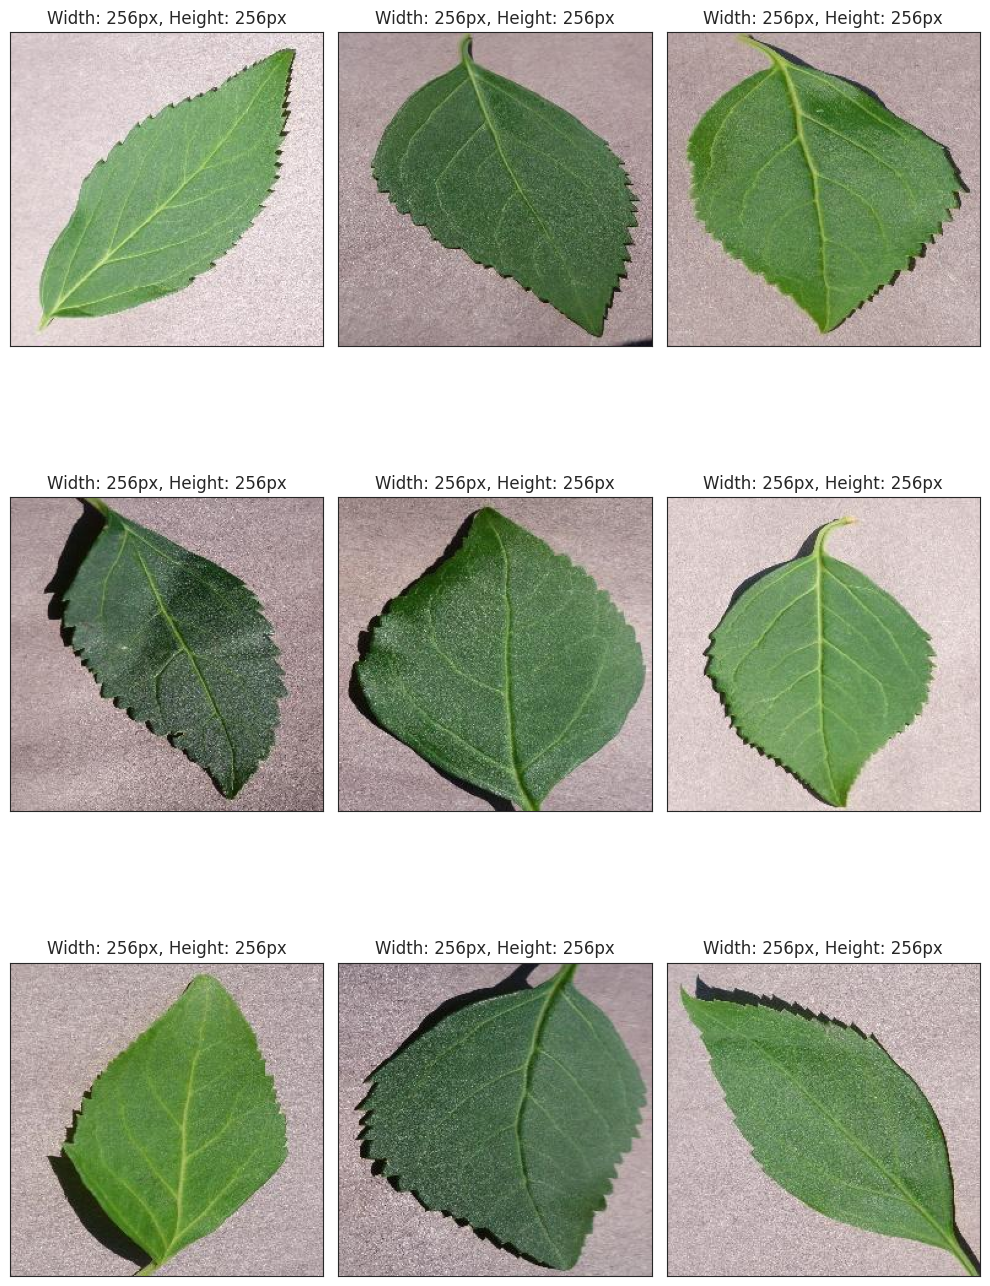



Infected


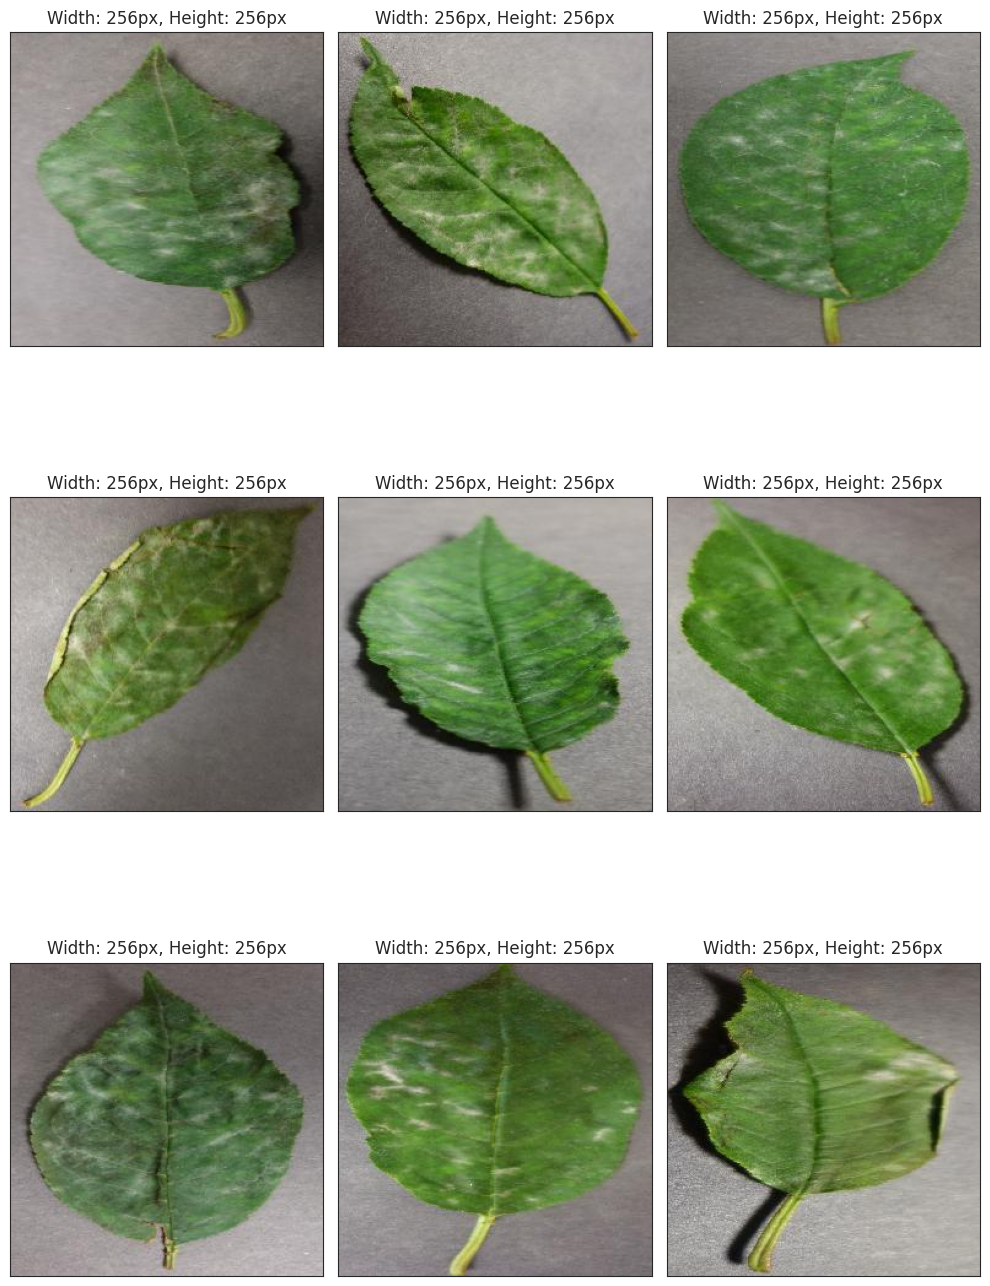

In [23]:
for label in labels:
    print(label)
    image_montage(dir_path=train_path,
                  label_to_display=label,
                  nrows=3, ncols=3,
                  figsize=(10, 15)
                  )
    print("\n")

---

# Feature Separability Analysis

---

## Principal Component Analysis (PCA)

- Reduces high-dimensional image data into key components while preserving important variance.
- Helps visualize whether Healthy and Infected leaves form distinct clusters based on extracted features.
- PC1 and PC2 are the first two principal components that capture the most variance in the data, allowing us to see the strongest patterns in feature space.

PCA plot saved at: outputs/v1/pca_plot.png


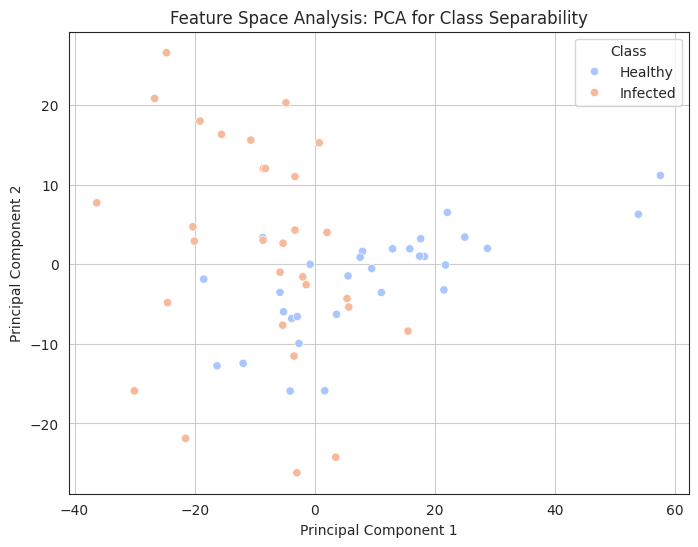

In [24]:
from sklearn.decomposition import PCA
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create output directory
output_dir = "outputs/v1"
os.makedirs(output_dir, exist_ok=True)

def perform_pca(X, y, n_components=2):
    """
    Performs PCA on the image dataset to analyze feature separability between Healthy and Infected leaves.

    Parameters:
    - X: NumPy array of images (flattened)
    - y: Corresponding labels (class names)
    - n_components: Number of PCA components (default: 2)

    Saves a PCA plot to visualize class separability.
    """
    # Flatten images for PCA
    X_flat = X.reshape(len(X), -1)

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_flat)

    # Create DataFrame for visualization
    df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
    df_pca["Label"] = y  

    # Plot PCA results
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Label", palette="coolwarm")
    plt.title("Feature Space Analysis: PCA for Class Separability")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Class")
    plt.grid(True)

    # Save the plot
    save_path = os.path.join(output_dir, "pca_plot.png")
    plt.savefig(save_path, bbox_inches="tight", dpi=150)
    print(f"PCA plot saved at: {save_path}")

    plt.show()

# Perform PCA visualization
perform_pca(X, y)

**Remarks**

- The PCA plot shows clear separation between Healthy and Infected leaves, indicating that there are strong differentiating features between the two classes.
- The spread along PC1 and PC2 represents the most important variations in the dataset.
- If classes overlap significantly, additional features may be needed to improve classification.

---

## Statistical Testing (t-test) for Pixel Intensity Differences

- Compares brightness distribution between Healthy and Infected leaves.
- Helps determine if certain intensity ranges are dominant in one class.

In [25]:
from scipy.stats import ttest_ind
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define dataset paths
test_path = "inputs/mildew_dataset/cherry-leaves/test"
healthy_dir = os.path.join(test_path, "Healthy")
infected_dir = os.path.join(test_path, "Infected")

# Function to load and preprocess images (keeping original color format)
def load_images(directory, num_samples=50, target_size=(128, 128)):
    """Loads and preprocesses images while maintaining RGB format."""
    images = [os.path.join(directory, img) for img in os.listdir(directory)[:num_samples]]
    return np.array([
        img_to_array(load_img(img, target_size=target_size)) / 255.0  # Normalize
        for img in images
    ])  # No reshape, keep original shape

# Load images (original color format)
healthy_data = load_images(healthy_dir)
infected_data = load_images(infected_dir)

# Perform independent t-test on all pixel values
t_stat, p_value = ttest_ind(healthy_data.flatten(), infected_data.flatten())

# Display t-test results
print("\n### Feature Separability: Statistical Test ###")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Statistically significant difference detected in pixel intensities.")
else:
    print("No significant difference in pixel intensities detected.")


### Feature Separability: Statistical Test ###
T-statistic: 474.2746
P-value: 0.0000e+00
Statistically significant difference detected in pixel intensities.


**Remarks**

The t-test confirms a statistically significant difference in brightness between Healthy and Infected leaves (p-value < 0.05).
This suggests that brightness features may be useful in classification.

---

## Pixel Intensity Distribution Analysis (Histogram)

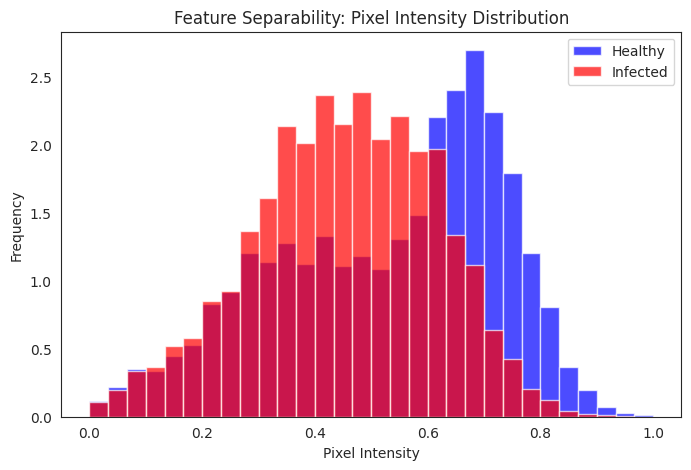

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(healthy_data.flatten(), bins=30, alpha=0.7, label="Healthy", color="blue", density=True)
plt.hist(infected_data.flatten(), bins=30, alpha=0.7, label="Infected", color="red", density=True)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.title("Feature Separability: Pixel Intensity Distribution")
plt.show()

**Remarks**

- The pixel intensity distribution shows clear differences between Healthy and Infected leaves.
- Healthy leaves have higher pixel intensity values, indicating a brighter appearance.
- Infected leaves have lower intensity values, suggesting darker or more uneven surfaces.
- This supports our t-test results, confirming significant brightness differences between the two classes.

---

# Conclusion and Next Steps

---

This notebook successfully provides visual insights into the dataset’s composition and characteristics. The key takeaways include:

1. Dataset Composition & Class Distribution
    - The dataset is well-balanced, reducing bias in model training.
    - Bar charts and image montages provide an overview of dataset quality.
2. Image Shape & Preprocessing
    - The average image size is 256x256 pixels, but images will be resized to 128x128 for computational efficiency.
    - Standardizing image dimensions ensures consistency in model input.
3. Class Variability & Statistical Insights
    - Mean Image Analysis: Healthy leaves are more uniform, while Infected leaves show greater variability.
    - Pixel Intensity Histogram: Infected leaves appear darker, confirming brightness differences.
    - T-Test Result: Significant statistical difference in pixel intensities between classes (p < 0.05).
4. Feature Space Visualization
    - PCA shows clear class separation, indicating strong distinguishing features between Healthy and Infected leaves.
    - This supports the hypothesis that deep learning can effectively classify the two categories.

## Next Steps
1. Data Preprocessing & Augmentation
    - Apply data augmentation and ensure image shape standardization (128x128x3).
    - Validate class distribution across datasets.
2. Model Training & Evaluation - Train a baseline CNN model and apply hyperparameter tuning for optimization. - Use PCA/t-SNE to visualize feature space and assess class separability. - Generate learning curves, confusion matrices, and classification reports.
3. Explainability & Model Selection - Use Saliency Maps for model interpretability. - Compare baseline vs. tuned CNN and select the best-performing model.
4. Deployment Preparation - Save the final model and related assets for Streamlit integration.

This concludes Data Visualization, moving to Modeling & Evaluation for training and refinement.
